# Midterm

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def forward_diff(u, h):
    return (np.roll(u, 1) - u) / h

def backward_diff(u, h):
    return (u - np.roll(u, -1)) / h

def center_diff(u, h):
    return (np.roll(u, 1) - np.roll(u, -1)) / (2 * h)

def double_diff(u, h):
    return (np.roll(u, 1) - (2*u) + np.roll(u, -1)) / h**2

In [29]:
def lax_wendroff(h, x_start, x_end, k, t_start, t_end, f):
    N = int(round(x_end - x_start) / h)
    M = int(round(t_end - t_start) / k)
    
    u = np.zeros((M + 1, N + 1))
    u[0] = f(x=np.linspace(x_start, x_end, N + 1))
    
    s = 25*k / (2*h)
    
    for n in range(M):
        u[n + 1] = u[n] - 5*k*center_diff(u[n], h) + s*k*h*double_diff(u[n], h)
        
    return u

In [30]:
def f(x):
    return np.sin(x)

In [31]:
h = 2*np.pi / 101
x_start = 0
x_end = 2 * np.pi
N = int(round(x_end - x_start)/h)

k = 2*np.pi / 101
t_start = 0
t_end = 2
M = int(round(t_end - t_start)/k)

x = np.linspace(x_start, x_end, N + 1)
t = np.linspace(t_start, t_end, M + 1)
X, T = np.meshgrid(x, t)

In [32]:
u = lax_wendroff(h, x_start, x_end, k, t_start, t_end, f)

In [33]:
! pip install ipympl

     |████████████████████████████████| 510 kB 9.4 MB/s eta 0:00:01


You should consider upgrading via the '/home/ianpotpie/.anaconda3/bin/python -m pip install --upgrade pip' command.


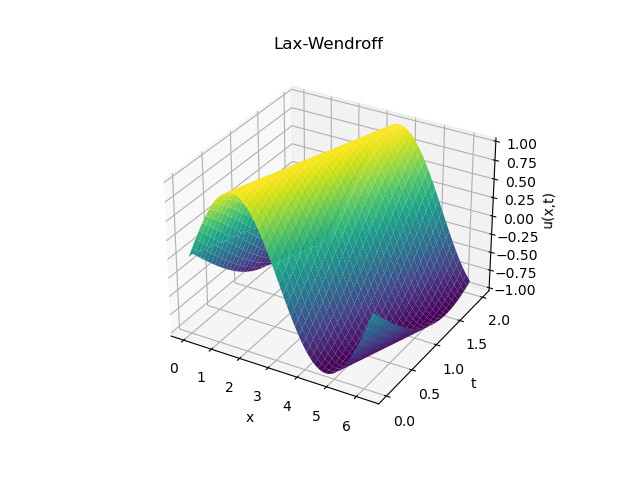

In [35]:
%matplotlib widget

ax = plt.axes(projection='3d')
ax.plot_surface(X, T, u, cmap="viridis")
ax.set_title("Lax-Wendroff")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
plt.show()

NameError: name 'true_x' is not defined

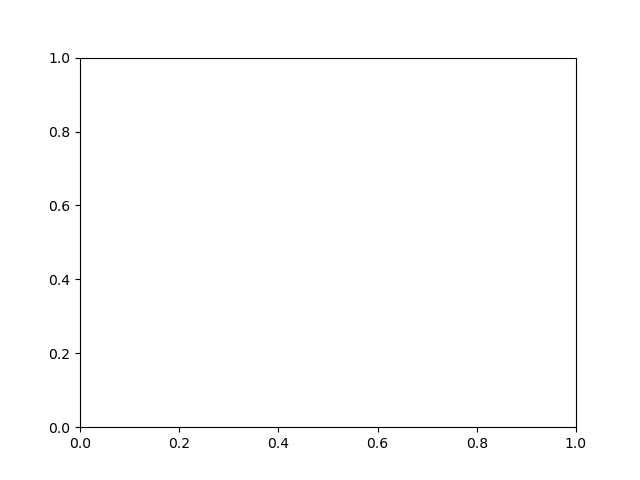

In [36]:
fig, ax = plt.subplots()
ax.plot(true_x, true_sol[-1], label="true value")
ax.plot(x, dufort_frankel(h, x_start, x_end, k, t_start, t_end, f)[-1], label="numerical")
ax.set_title('Lax-Wendroff')
ax.set_xlabel('x')
ax.set_ylabel('u(x, 2)')
ax.legend()
plt.show()